## 🛑 Complete los siguientes datos

- Nombre y Apellidos: Katrin Muñoz Errasti
- Entrega: Plantilla de práctica 03 - Image processing
- Fecha: 31/10/2025
- Tiempo dedicado a la entrega: aproximadamente 10-12 horas repartidas en varios días
- Principales dudas y dificultades encontrados en el desarrollo:
    * **Límite de GPU en Google Colab:** a mitad de los entrenamientos (cuando estaba con los modelos grandes) Colab me quitó la GPU por uso excesivo. Para no rehacer todo, cambié a mi cuenta personal.
    * **Modelos no completados:** algunas arquitecturas terminaban antes de terminar todas las epochs. Por esta razón descarte los modelos más grandes.
    * **Busqueda arquitectura conocida para imágenes pequeñas:** Fashion-MNIST tiene resolucion de 28x28 en escala de grises, muchas arquitecturas estan pensadas para tres canales y escalas más grandes.
    * **Visualización de activaciones:** este apartado fue el que más dificultad me supuso ya que al principio no sabía como construir el nuevo modelo y que me devolviera las salidas de las capas convolucionales.
    * **Ablation Study:** si bien no tuve problemas para la parte técnica del apartado, si en decidir que componentes del modelo 3 eran más relevantes estudiar.
    * **Replicar resultados**: como los modelos entrenan con distintas imágenes cada vez, no es posible replicar ni los entrenamientos ni los resultados. Esto me ha traido problemas a la hora de comparar los resultados, sobre todo entre los Modelos 2, 3 y 4 y en ablation study. Esto, en otra ocasión, se podría mejorar usando una semilla para replicar la aleatoriedad de las imagenes.

#Instrucciones Generales

**Laboratorio de IA**

**Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correpondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica.

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código).

Consideraciones generales sobre el código:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario.


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación:**  Esta práctica cuenta un 12.5% de la evaluación final de la asignatura.

En las indicaciones, hay instrucciones extra indicadas con el símbolo 🤖. No son requisitos para superar la práctica, sino acciones que puedes realizar para mejorar la calificación.

La calificación de los ejercicios se hará con los siguientes criterios:
- [9 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras (🤖) que avalan su excelencia.
- [7 a 9] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 7] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

En las próximas celdas, tendrá que desarrollar un sistema de clasificación de imágenes de moda, haciendo uso del dataset Fashion-MNIST: [Dataset](https://keras.io/api/datasets/fashion_mnist/). El alumno probará diferentes arquitecturas y proporcionara el accuracy de cada una.

**Requisitos básicos**
 - Utilizar al menos 4 modelos própios.
 - Utilizar al menos 2 arquitecturas conocidas.
 - Hacer uso de data augmentation.

**Consideraciones deseables**
 - Incluir alguna métrica adicional para la evaluación de los modelos, como puede ser precision, recall o f1-score. Pista: la librería Scikit-learn incluye clases para hacerlo, por ejemplo [la siguiente clase](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

**🤖Requisitos extra**
 - Hacer un ablation study con alguno de los modelos propios. Un ablation study consiste en estudiar como cada una de las variables afecta al resultado final, haciendo experimentos con cada una de ellas por separado y mostrando los resultados. Habra que presentar una tabla mostrando como los cambios de cada variable estudiada afecta al resultado final.
 - Mostrar las activaciones de las capas convolucionales de uno de los modelos propios, un ejemplo puede encontrarse [aquí](https://www.kaggle.com/code/amarjeet007/visualize-cnn-with-keras).



#**Práctica 3 - Image Processing**

Instalación del paquete necesario

In [ ]:
# Si utiliza paquetes extra que no se encuentran por defecto en colab, instalelos aquí

Importar librerías

In [ ]:
# La biblioteca Keras sirve para construir
# y entrenar modelos de Deep Learning
import keras
from keras.models import Sequential, Model
from keras.layers import (
    Dense, Dropout, Flatten, BatchNormalization,
    Input, Lambda, GlobalAveragePooling2D,
    Conv2D, MaxPooling2D, Add, Activation
)
from keras.optimizers import Adam
from keras import backend as K

# Estas librerías sirven para cargar el dataset y hacer el preprocesamiento
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Estas librerías sirven para usar métricas adicionales
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#  Modelos pre-entrenados
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mobilenet_preprocess
from keras.applications.efficientnet import EfficientNetB0, preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnetv2_preprocess

# Bibliotecas para graficar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# Librería para cumplir con el requisitio de usar Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

# **Carga del dataset y creación de los conjuntos de entrenamiento.**

Es imprescindible que antes de entrenar los modelos preparemos nuestros datos.

## Carga del dataset Fashion-MNIST

Cargamos el dataset que ya viene dividido en 2 grupos entrenamiento y prueba.

In [ ]:
# Recogemos los datos que vienen en el dataset en tuplas de 2 partes
  # Datos de entrenamiento: x_train_full e y_train_full
  # Datos de prueba: x_test e y_test
  # X: imagen 28x28 en escala de grises
  # Y: etiqueta de la imagen (0-9)
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Verificar tamaño de los datos
print('x_train_full:', x_train_full.shape, '| y_train_full:', y_train_full.shape)
print('x_test:', x_test.shape, '| y_test:', y_test.shape)

x_train_full: (60000, 28, 28) | y_train_full: (60000,)
x_test: (10000, 28, 28) | y_test: (10000,)


## Normalización y canales

Las imágenes tiene valores de pixeles en el rango [0,255], por lo que las escalamos al rango [0,1] para luego poder operar con ellas, es decir las normalizamos.

Las CNNs tienen como argumento de entrada el alto el ancho y el número de canales. Primero añadimos un canal para que la forma se (28,28,1) y luego repetimos el canal 3 veces porque para las arquitecturas conocidas necesitamos 3 canales (RGB), esto nos permite usar los pesos de ImageNet.

In [ ]:
# Convertimos las etiqueas en vectores de 1 dimensión
y_train_full = y_train_full.reshape(-1,)
y_test       = y_test.reshape(-1,)

# Normalizamos los píxeles de las imágenes al rango [0,1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test       = x_test.astype('float32') / 255.0

# Añadimos un canal, Resultado: (Num. muestras, 28,28,1)
x_train_full_1ch = np.expand_dims(x_train_full, -1)
x_test_1ch       = np.expand_dims(x_test, -1)

## Dividir los grupos de Entrenamiento y validación

El conjunto de prueba *x_test* solo debe usarse en la evaluación final del modelo, una vez se haya entrenado porque sirve para estimar el rendimiento real del modelo con datos que hasta ese momento no ha visto.

Mientras entrena, necesitamos un subconjunto para ajustar y supervisar el entrenamiento. Por eso, dividimos el conjunto de datos de entrenamiento original x_train_full en dos subconjuntos:

*   **Conjunto de entrenamiento:**
    *  x_train
    * Equivale al 80% de los datos
    * Sirve para ajustar los pesos

*   **Conjunto de validación:**
    * x_val
    * Equivale al 20% de los datos
    * Se utiliza para comprobar el sobreajuste y comparar arquitecturas



In [ ]:

# Dividimos antes de repetir los canales, utilizamos la funcion "stratify"
  # "Stratify": funcion que asegura que la distribución de clases sea la misma
  # en el entrenamiento y en la validación.
x_train_1ch, x_val_1ch, y_train, y_val = train_test_split(
    x_train_full_1ch, y_train_full,
    test_size=0.20, stratify=y_train_full
)

# Creamos las versiones con 3 canales para los modelos
x_train_3ch = np.repeat(x_train_1ch, 3, axis=-1)
x_val_3ch   = np.repeat(x_val_1ch,   3, axis=-1)
x_test_3ch  = np.repeat(x_test_1ch,  3, axis=-1)

## Visualización de datos
Mostrar 25 imágenes aleatorias del conjunto de entrenamiento junto a sus etiquetas (es importante verificar que las imágenes y las etiquetas coinciden).

Graficar el número de imágenes por clase en cada conjunto para verificar que la división de los conjuntos entrenamiento y validación mantiene la distribución original de clases. Es importante que esten balanceadas para no afectar a métricas como el accuracy y evitar sesgos en la evaluación.

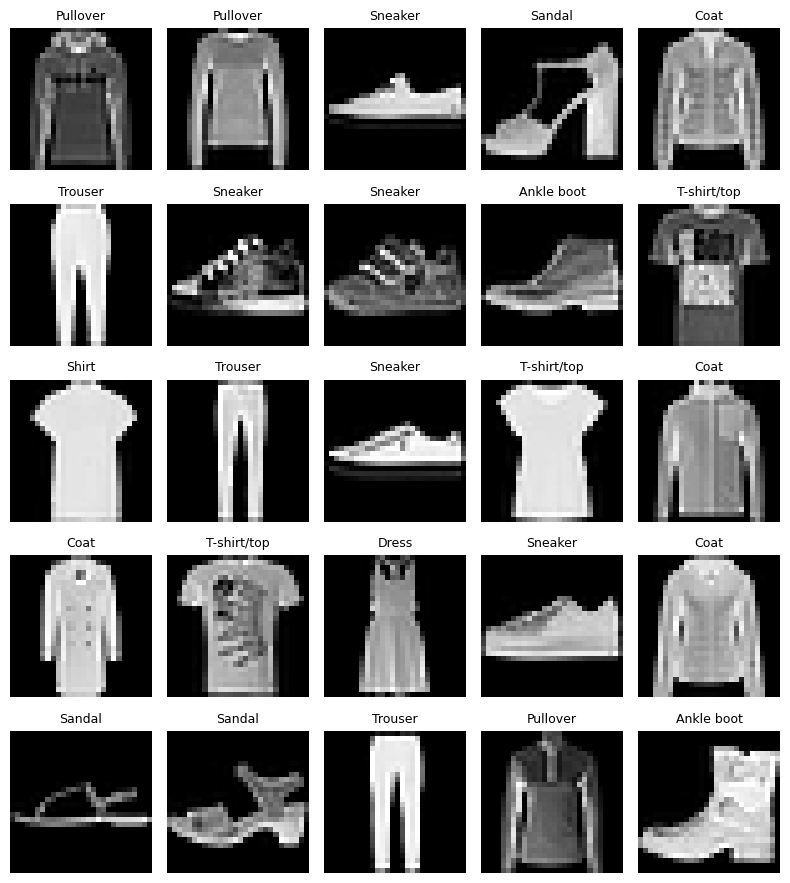

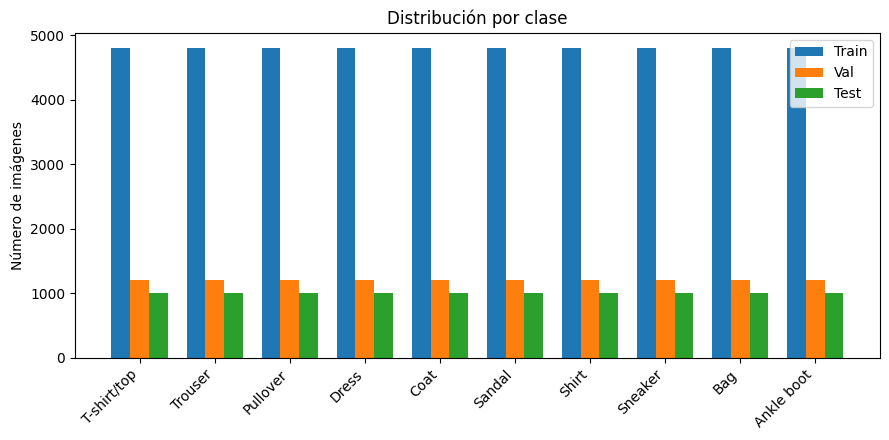

In [ ]:
# Definimos los nombres de las clases
classnames = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualización de imágenes
idxs = np.random.randint(x_train_3ch.shape[0], size=25)
images = x_train_3ch[idxs]
labels = y_train[idxs]

fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(classnames[int(labels[i])], fontsize=9)
plt.tight_layout(); plt.show()


# Visualización de distribución de clases
def counts_by_class(y, n_classes=10):
    vals, cnts = np.unique(y, return_counts=True)
    out = np.zeros(n_classes, dtype=int)
    out[vals] = cnts
    return out

train_counts = counts_by_class(y_train)
val_counts   = counts_by_class(y_val)
test_counts  = counts_by_class(y_test)

xpos = np.arange(10); width = 0.25
fig, ax = plt.subplots(figsize=(9,4.5))
ax.bar(xpos - width, train_counts, width, label='Train')
ax.bar(xpos,         val_counts,   width, label='Val')
ax.bar(xpos + width, test_counts,  width, label='Test')
ax.set_xticks(xpos); ax.set_xticklabels(classnames, rotation=45, ha='right')
ax.set_ylabel('Número de imágenes'); ax.set_title('Distribución por clase')
ax.legend(); plt.tight_layout(); plt.show()

## Preparación final
El objetivo es que los modelos predigan la probabilidad de cada una de las 10 clases para cada imagen. Para ello, las etiquetas deben estar en formato one-hot. Voy a usar 28x28x3 en todos los modelos, para simplificar (es imprescindible para las arquitecturas conocidas) aunque es cierto que los modelos propios podrían entrenar con solo 1 canal y que los resultados probablemente serían mejores.

In [ ]:
# Número de clases y tamaño de entrada de los datos
num_classes = 10
input_shape = (28, 28, 3)

# Las etiquetas deben estar en formato one-hot
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat   = to_categorical(y_val,   num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)

# Para calcular las métricas necesitamos que las etiquetas esten en formato entero
Y_true = np.argmax(y_test_cat, axis=1)

# **Data augmentation**
Es imprescindible que para que los modelos de Deep Learning generalicen bien evitando el overfitting tengan una gran cantidad de datos.

Como el dataset es limitado, utilizando transformaciones en las imágenes de entrenamiento existentes, creamos datos nuevos. Esto hace que nuestro modelo sea más robusto frente a este tipo de transformaciones. Estas imágenes solo se usan durante el entrenamiento, no se utilizan ni en la fase de validación ni en el test.

In [ ]:
# Definir el Generador de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    zoom_range=0.10
)
# Ajustar el generador con los datos de entrenamiento
datagen.fit(x_train_3ch)

# **Creación de modelos**
En esta sección se definen los modelos para la tarea de clasificacion multiclase del dataset Fashion-MNIST, utilizando entrenamiento supervisado y los datos aumentados del apartado anterior.

Definición del problema (T-E-P)


*   **Tarea**
    * Clasificar imágenes de prendas de vestir
*   **Experiencia**
    * Entrenamiento supervisado con el dataset y el generador de datos
*   **Medida de rendimiento**
    * Métrica principal durante el entrenamiento: accuracy
    * Métricas adicionales para la evaluación final: precision, recall, f1-score

 A lo largo de la práctica se entrenan 6  modelos, 2 arquitecturas conocidas y 4 modelos propios.

In [ ]:
# Variables Globales de Entrenamiento
BATCH_SIZE = 128
EPOCHS = 15

results = []

## **Modelo A: MobileNetV2**

En este modelo se aplica *transfer learning* utilizando MobileNetV2 preentrenada en ImageNet, de modo que se aprovechan las características ya aprendidas y solo se adapta la parte final a la tarea de clasificación de Fashion-MNIST.

Primero, hay que adaptar la entrada, ya que las imágenes originales son de 28x28 y deben ser de 96x96 y se les aplica el preprocesado.

Segundo, cargar el modelo base para reutilizando la parte convolucional.

Tercero, se congela la base para no actualizar los pesos preentrenados y entrenar únicamente las capas añadidas.

Por último, se añaden las capas finales (pooling, dropout y capa densa con *softmax*) para obtener las 10 clases del problema.

In [ ]:
# Definir la entrada con nuestra forma (28,28,3)
input_image_A = Input(shape=input_shape)

# Capas Lambda para adaptar la imagen
resized_image_A = Lambda(lambda image: tf.image.resize(image, (96, 96)), name="resize_96")(input_image_A)
preprocessed_A  = Lambda(lambda img: mobilenet_preprocess(img * 255.0), name="mobilenet_preprocess")(resized_image_A)

# Cargar y congelar la base de MobileNetV2
base_mnv2 = MobileNetV2(weights='imagenet', include_top=False, input_tensor=preprocessed_A)
base_mnv2.trainable = False

# 4. Añadir el clasificador
xA = base_mnv2.output
xA = GlobalAveragePooling2D()(xA)
xA = Dropout(0.5)(xA)
xA = Dense(256, activation='relu')(xA)
xA = Dropout(0.5)(xA)
predictions_A = Dense(num_classes, activation='softmax')(xA)

# Crear y compilar el modelo final
model_A = Model(inputs=input_image_A, outputs=predictions_A, name="MobileNetV2_Fashion")

model_A.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_A.summary()

/tmp/ipython-input-600223073.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_mnv2 = MobileNetV2(weights='imagenet', include_top=False, input_tensor=preprocessed_A)


Model: "MobileNetV2_Fashion"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_96 (Lambda)  │ (None, 96, 96, 3) │          0 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenet_preproce… │ (None, 96, 96, 3) │          0 │ resize_96[0][0]   │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ mobilenet_prepro… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                 

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## **Modelo B: EfficientNetB0**
En este apartado intenté poner una arquitectura que tuviera sentido con el dataset, para aprovechar al máximo el transfer learning de ImageNet. Probé varias arquitecturas y me quedé con la que me daba mejor relación entre robustez y coste de computación.

**Arquitecturas probadas:**
*   ResNet50V2: es la primera arquitectura que probé, con ImageNet da muy buenos resultados, el problema es que espera 224x224x3 y escalar de 28 a 224 es muy agresivo por lo que se pierde mucha información fina.
*   EfficientNetB3: intenté usar esta versión porque en la tabla de modelos tenía mejor accuracy que el modelo A pero al ejecutarlo no terminaba de entrenar.
*   DenseNet121: con este modelo tuve un resultado parecido al que tuve con ResNet, el escalado, por lo que el coste computacional no me compensaba.

Después de las pruebas tuve claras 2 cosas, que no podía usar arquitecturas muy pesadas y que el problema principal era el escalado.

Al final me quede con EfficientNetB0 principalmente porque acepta trabajar con 96x96, un reescalado mucho más razonable y además, se entrena sin problemas en Colab.

El proceso es idéntico al de MobileNetV2: adaptar la entrada (resize + preprocess), congelar la base y añadir una cabecera densa para las 10 clases.

In [ ]:
# Definir la entrada con nuestra forma (28,28,3)
input_image_B = Input(shape=input_shape)

# EfficientNetB0 tiene como dimensión estandar 224x224 usamos las capas Lambda para adaptar la imagen
resized_image_B = Lambda(lambda image: tf.image.resize(image, (96, 96)), name="resize_96")(input_image_B)
preprocessed_B = Lambda(lambda img: efficientnet_preprocess(img * 255.0), name="efficientnet_preprocess")(resized_image_B)

# Cargar y congelar la base de EfficientNetB0
base_effnet  = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=preprocessed_B)
base_effnet .trainable = False  # fase congelada (puedes afinar luego)

# 4. Añadir el clasificador
xB = base_effnet.output
xB = GlobalAveragePooling2D(name="gap")(xB)
xB = Dropout(0.4, name="dropout_1")(xB)
xB = Dense(192, activation='relu', name="dense_192")(xB)
xB = Dropout(0.3, name="dropout_2")(xB)
predictions_B = Dense(num_classes, activation='softmax')(xB)

# Crear y compilar el modelo final
model_B = Model(inputs=input_image_B, outputs=predictions_B, name="EfficientNetB0_Fashion")
model_B.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_B.summary()


Model: "EfficientNetB0_Fashion"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_96 (Lambda)  │ (None, 96, 96, 3) │          0 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnet_prepr… │ (None, 96, 96, 3) │          0 │ resize_96[0][0]   │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 96, 96, 3) │          0 │ efficientnet_pre… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 96, 96, 3) │          7 │ rescaling_2[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 96, 96, 3) │          0 │ normalization_1[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                 

 Total params: 4,297,453 (16.39 MB)

 Trainable params: 247,882 (968.29 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## **Modelo 1: Simple**

Este es el modelo más simple de los 4, sigue la arquitectura clásica de CNN: INPUT → CONV → POOL → FLATTEN → FC


*   Conv2D
    * Capa convolucional con 32 filtros de tamaño 3x3
    * Aprende 32 patrones diferentes
        * Bordes, texturas simples...
*   MaxPooling2D
    * Capa de pooling que reduce el tamaño a la mitad usando una ventana de 2x2
    * Objetivos: reducir el número de parámetros y controlar el overfitting
*   Flatten
    * Convierte el mapa de características en un vector de 1 dimensión para conectarlo con la capa densa
*   Dense
    * La capa final de clasificación. Aprende combinaciones de los patrones detectados

In [ ]:
# Crear modelo secuencial
model_1 = Sequential(name="Modelo_1")

# Capa de entrada (imágenes de tamaño 28x28x3)
model_1.add(Input(shape=input_shape))

# Capa Convolucional
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Capa de Pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamos el mapa de características a un vector 1D
model_1.add(Flatten())

# Capa Densa
model_1.add(Dense(64, activation='relu'))
# Capa de salida tiene 1 neurona por clase
model_1.add(Dense(num_classes, activation='softmax'))

# Crear y compilar el modelo final
model_1.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_1.summary()

Model: "Modelo_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,722 (1.33 MB)

 Trainable params: 347,722 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

## **Modelo 2: Estilo VGG**
En este modelo se sigue un enfoque parecido a las redes tipo VGG, es decir, apilar capas convolucionales antes de reducir el tamaño.
La arquitectura es INPUT → CONV → CONV → POOL → FLATTEN → FC.


*   Conv2D (32) → Conv2D (64):
    * Apilamos dos capas Conv2D seguidas.
    * Conv2D(32): patrones simples
        * Bordes
    * Conv2D(64): patrones más complejos
        * Esquinas, curvas
*   MaxPooling2D:
*   Dropout (0.25):
    * Apaga aleatoriamente el 25% de las neuronas de la capa anterior durante el entrenamiento
    * Objetivo: evitar sobreajuste
*   Flatten:
*   Dense:
    * Al ampliar la capacidad podemos manejar más características


In [ ]:
# Crear modelo secuencial
model_2 = Sequential(name="Modelo_2")

# Capa de entrada
model_2.add(Input(shape=input_shape))

# Capa convolucional (32 filtros)
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Capa convolucional (64 filtros)
model_2.add(Conv2D(64, (3, 3), activation='relu'))

# Capa de pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
model_2.add(Dropout(0.25))

# Aplanamos el mapa de características a 1D
model_2.add(Flatten())

# Capa Densa
model_2.add(Dense(128, activation='relu'))

# Dropout
model_2.add(Dropout(0.5))

# Capa de salida tiene una neurona por clase
model_2.add(Dense(num_classes, activation='softmax'))

# Crear y compilar el modelo final
model_2.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_2.summary()

Model: "Modelo_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,458 (4.58 MB)

 Trainable params: 1,200,458 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## **Modelo 3: Estilo VGG profundo**
Este modelo es parecido al anterior pero más profundo, apila 2 bloques VGG completos.
La arquitectura: INPUT → [BLOQUE_1] → [BLOQUE_2] → FLATTEN → FC

*   Bloque 1:
    * [CONV→CONV→POOL]
    * 32 filtros
        * Bordes, texturas
    * Reducir el tamaño a 14x14

*   Bloque 2:
    * [CONV→CONV→POOL]
    * 64 filtros
        * Patrones más complejos
    * Reducir el tamaño a 7x7
*   Dropout
*   Flatten
*   Dense:
    * Al ampliar la capacidad podemos manejar más características.

In [ ]:
# Crear modelo secuencial
model_3 = Sequential(name="Modelo_3")

# Capa de entrada (imágenes de tamaño 28x28x3)
model_3.add(Input(shape=input_shape))

# Bloque 1
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# Bloque 2
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

# Clasificador
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))

# Capa de salida tiene una neurona por clase
model_3.add(Dense(num_classes, activation='softmax'))

# Crear y compilar el modelo final
model_3.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_3.summary()

Model: "Modelo_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 871,210 (3.32 MB)

 Trainable params: 871,210 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

## **Modelo 4: Profundo con BN**

Este es el modelo más profundo de los 4, se basa en los apuntes de clase, utiliza menos pooling layers.

Arquitectura: INPUT → [BLOQUE_1]*3 → [CLASIFICADOR]*2 → FC

Arquitectura: INPUT → [CONV → RELU → CONV → RELU → POOL]*3 → [FC → RELU]*2 → FC

*   Bloque_1:
    * 3 bloques convolucionales
    * Conv2D (32)
        * Bordes, texturas
    * Conv2D (64)
        * Partes de objetos
    * Conv2D (128)
        * Características más abstractas
*   Dropout (0.2, 0.3, 0.4):
    * Aumentar el dropout progresivamente para regularizar la red y evitar el overfitting(es una técnica muy común)
*   Flatten
*   Dense:
    * Es un clasificador con 2 capas, para que el modelo tenga más capacidad de encontrar características detectadas en los BLOQUE_1

In [ ]:
# Crear modelo secuencial
model_4 = Sequential(name="Modelo_4")

# Bloque 1
model_4.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.2))

# Bloque 2
model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.3))

# Bloque 3
model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.4))

# Clasificador
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))

# Crear y compilar el modelo final
model_4.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_4.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 7, 7, 128)      │             

 Total params: 587,562 (2.24 MB)

 Trainable params: 586,154 (2.24 MB)

 Non-trainable params: 1,408 (5.50 KB)

# **Entrenamiento de los modelos**
En este apartado se entrenan los modelos utilizando el generador de "data augmentation" definido previamente. En todos los modelos he utilizado el mismo número de epochs para que la comparación sea lo más justa posible.

El entrenamiento se realiza sobre el conjunto de entrenamiento aumentado. Se valida en el conjunto de validación para monitorizar la evolución del accuracy y detectar posible sobreajuste.

## **Entrenamiento del Modelo A**

In [ ]:
history_A = model_A.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 114ms/step - accuracy: 0.5212 - loss: 1.6204 - val_accuracy: 0.7922 - val_loss: 0.5664
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.7128 - loss: 0.7864 - val_accuracy: 0.8113 - val_loss: 0.5113
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.7420 - loss: 0.7135 - val_accuracy: 0.8275 - val_loss: 0.4777
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.7486 - loss: 0.6828 - val_accuracy: 0.8169 - val_loss: 0.4757
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.7610 - loss: 0.6579 - val_accuracy: 0.8213 - val_loss: 0.4863
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.7620 - loss: 0.6484 - val_accuracy: 0.8356 - val_loss: 0.4534
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - accuracy: 0.7647 - loss: 0.6423 - val_accuracy: 0.8214 - val_loss: 0.4730
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.7683 - loss: 0.6166 - val_accura

## **Entrenamiento del Modelo B**


In [ ]:
history_B = model_B.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 118ms/step - accuracy: 0.7338 - loss: 0.7696 - val_accuracy: 0.8449 - val_loss: 0.4035
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8298 - loss: 0.4607 - val_accuracy: 0.8663 - val_loss: 0.3618
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.8350 - loss: 0.4386 - val_accuracy: 0.8674 - val_loss: 0.3535
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.8431 - loss: 0.4266 - val_accuracy: 0.8701 - val_loss: 0.3461
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.8442 - loss: 0.4161 - val_accuracy: 0.8744 - val_loss: 0.3388
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.8452 - loss: 0.4120 - val_accuracy: 0.8751 - val_loss: 0.3363
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.8524 - loss: 0.3988 - val_accuracy: 0.8785 - val_loss: 0.3260
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.8527 - loss: 0.3978 -

## **Entrenamiento del Modelo 1**


In [ ]:
history_1 = model_1.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.6399 - loss: 1.0020 - val_accuracy: 0.8148 - val_loss: 0.5120
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.7785 - loss: 0.6017 - val_accuracy: 0.8173 - val_loss: 0.4841
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8015 - loss: 0.5354 - val_accuracy: 0.8478 - val_loss: 0.4261
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8113 - loss: 0.5098 - val_accuracy: 0.8537 - val_loss: 0.4104
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8195 - loss: 0.4837 - val_accuracy: 0.8578 - val_loss: 0.4023
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8200 - loss: 0.4751 - val_accuracy: 0.8637 - val_loss: 0.3791
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8302 - loss: 0.4474 - val_accuracy: 0.8442 - val_loss: 0.4142
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8329 - loss: 0.4458 - 

## **Entrenamiento del Modelo 2**


In [ ]:
history_2 = model_2.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.5938 - loss: 1.1070 - val_accuracy: 0.8027 - val_loss: 0.5256
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.7531 - loss: 0.6538 - val_accuracy: 0.8292 - val_loss: 0.4438
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.7801 - loss: 0.5820 - val_accuracy: 0.8531 - val_loss: 0.3887
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7943 - loss: 0.5460 - val_accuracy: 0.8624 - val_loss: 0.3717
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.8046 - loss: 0.5199 - val_accuracy: 0.8657 - val_loss: 0.3712
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.8159 - loss: 0.4967 - val_accuracy: 0.8714 - val_loss: 0.3502
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.8209 - loss: 0.4824 - val_accuracy: 0.8839 - val_loss: 0.3200
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.8272 - loss: 0.4647 - 

## **Entrenamiento del Modelo 3**


In [ ]:
history_3 = model_3.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.5872 - loss: 1.1098 - val_accuracy: 0.8211 - val_loss: 0.4624
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.7752 - loss: 0.5843 - val_accuracy: 0.8610 - val_loss: 0.3723
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8123 - loss: 0.5051 - val_accuracy: 0.8754 - val_loss: 0.3348
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8287 - loss: 0.4538 - val_accuracy: 0.8799 - val_loss: 0.3140
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8397 - loss: 0.4252 - val_accuracy: 0.8888 - val_loss: 0.3016
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.8516 - loss: 0.4051 - val_accuracy: 0.8992 - val_loss: 0.2753
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8611 - loss: 0.3768 - val_accuracy: 0.8980 - val_loss: 0.2782
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8606 - loss: 0.3760 - 

## **Entrenamiento del Modelo 4**


In [ ]:
history_4 = model_4.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.5484 - loss: 1.3949 - val_accuracy: 0.4348 - val_loss: 1.5353
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.7602 - loss: 0.6298 - val_accuracy: 0.8435 - val_loss: 0.4118
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.7988 - loss: 0.5391 - val_accuracy: 0.8623 - val_loss: 0.3753
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.8178 - loss: 0.4788 - val_accuracy: 0.8651 - val_loss: 0.3661
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.8344 - loss: 0.4480 - val_accuracy: 0.8815 - val_loss: 0.3266
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.8466 - loss: 0.4177 - val_accuracy: 0.8394 - val_loss: 0.4483
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.8521 - loss: 0.3980 - val_accuracy: 0.8827 - val_loss: 0.3179
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.8593 - loss: 0.3820 - 

# **Evaluación de los modelos**

Primero, se visualizan las curvas de accuracy y loss (train/val) para comprobar convergencia y posible sobreajuste.

Después, se evalúa en el conjunto de test y se generan el classification report y la matriz de confusión.

**Classification report:** sirve para ver que tal clasifica el modelo en cada clase, no solo el promedio. Por cada clase se obtiene esta información:


*   precision:
    * Relación entre predicciones correctas y el total de predicciones realizadas
*   recall:
    * Proporción de muestras de la clase que el modelo ha identificado correctamente
*   F1-score:
    * Media armónica entre las dos anteriores
*   Support:
    * Número de muestras reales de cada clase

**Matriz de confusión:** tabla que compara las etiquetas reales con las predichas. Permite ver que clases identifica bien y que clases confude entre si.

*   Filas: clases reales
*   Columnas: clases predichas
*   Diagonal: clases que ha acertado

Finalmente, se guarda la test accuracy para compararla con el resto de modelos.

## **Evaluación del Modelo A**

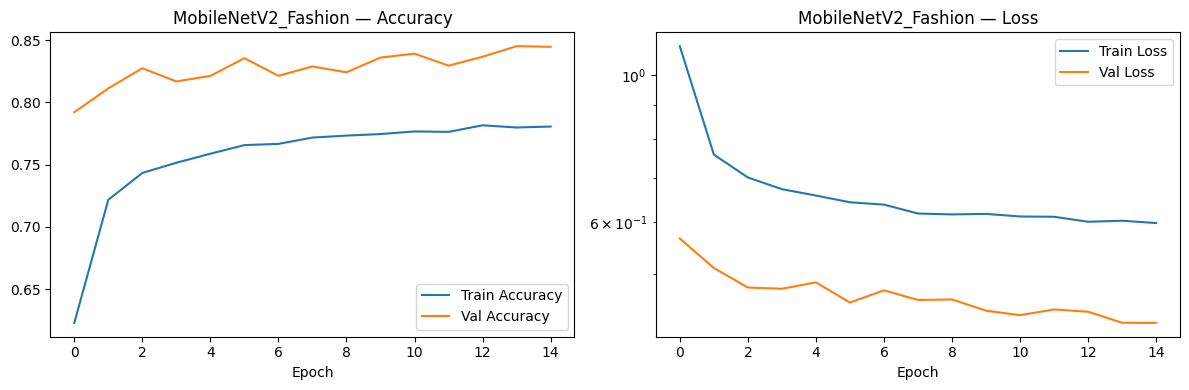

MobileNetV2_Fashion — Test loss:    0.4318
MobileNetV2_Fashion — Test accuracy: 0.8448

MobileNetV2_Fashion — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8279    0.7890    0.8080      1000
     Trouser     0.9956    0.9070    0.9492      1000
    Pullover     0.8491    0.7710    0.8082      1000
       Dress     0.7662    0.8420    0.8023      1000
        Coat     0.7235    0.8270    0.7718      1000
      Sandal     0.9000    0.9270    0.9133      1000
       Shirt     0.6154    0.6000    0.6076      1000
     Sneaker     0.8937    0.8830    0.8883      1000
         Bag     0.9673    0.9750    0.9711      1000
  Ankle boot     0.9411    0.9270    0.9340      1000

    accuracy                         0.8448     10000
   macro avg     0.8480    0.8448    0.8454     10000
weighted avg     0.8480    0.8448    0.8454     10000



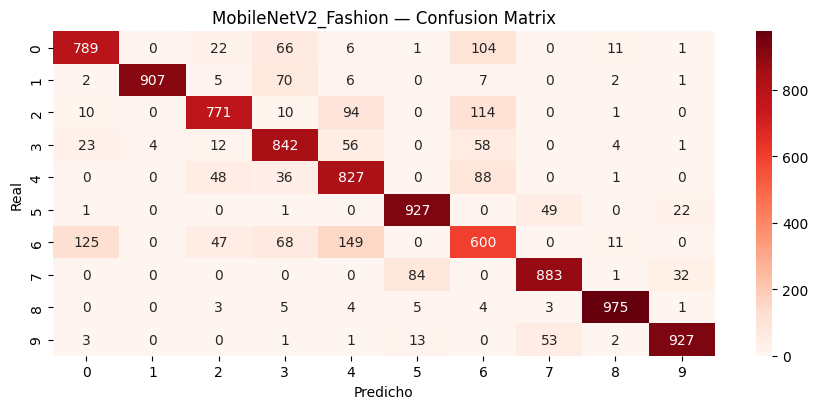

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_A.history['accuracy'], label='Train Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_A.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_A.history['loss'], label='Train Loss')
plt.plot(history_A.history['val_loss'], label='Val Loss')
plt.title(f'{model_A.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')

plt.tight_layout(); plt.show()

# Evaluación en test
score_A = model_A.evaluate(x_test_3ch, y_test_cat, verbose=0)

print(f'{model_A.name} — Test loss:    {score_A[0]:.4f}')
print(f'{model_A.name} — Test accuracy: {score_A[1]:.4f}')

# Clasification report
y_pred_A = model_A.predict(x_test_3ch, verbose=0)
Y_pred_A = np.argmax(y_pred_A, axis=1)

print(f"\n{model_A.name} — Classification Report")
print(classification_report(Y_true, Y_pred_A, target_names=classnames, digits=4))

# Matriz de confusión
cm_A = confusion_matrix(Y_true, Y_pred_A)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_A), annot=True, fmt='g', cmap='Reds', ax=ax)

plt.title(f'{model_A.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_A.name, "test_acc": float(score_A[1])})

## **Evaluación del Modelo B**


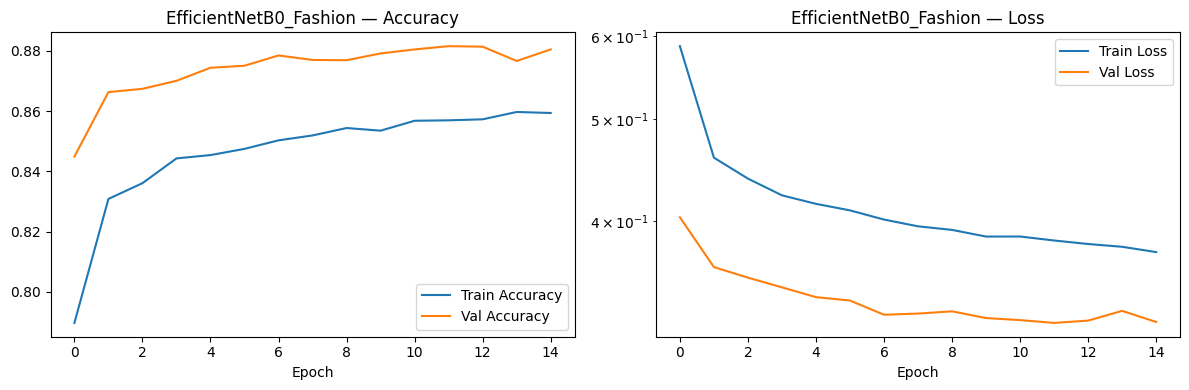

EfficientNetB0_Fashion — Test loss:    0.3248
EfficientNetB0_Fashion — Test accuracy: 0.8820

EfficientNetB0_Fashion — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8408    0.8290    0.8348      1000
     Trouser     0.9949    0.9700    0.9823      1000
    Pullover     0.8703    0.8120    0.8401      1000
       Dress     0.9117    0.8160    0.8612      1000
        Coat     0.7545    0.8880    0.8158      1000
      Sandal     0.9829    0.9210    0.9510      1000
       Shirt     0.6696    0.6930    0.6811      1000
     Sneaker     0.8893    0.9720    0.9288      1000
         Bag     0.9820    0.9830    0.9825      1000
  Ankle boot     0.9669    0.9360    0.9512      1000

    accuracy                         0.8820     10000
   macro avg     0.8863    0.8820    0.8829     10000
weighted avg     0.8863    0.8820    0.8829     10000



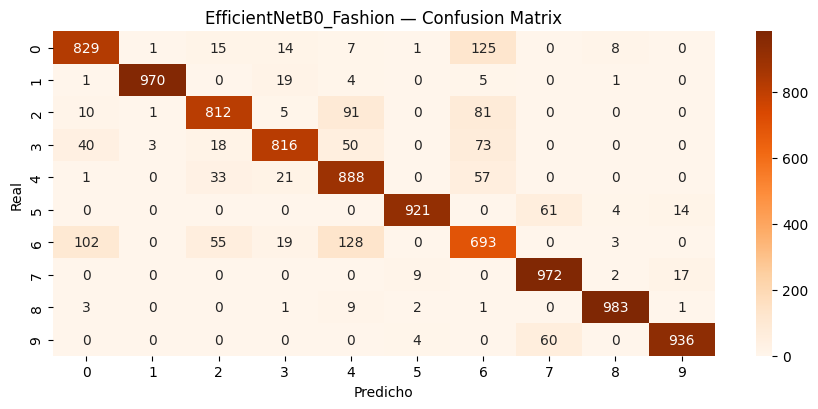

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_B.history['accuracy'], label='Train Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_B.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_B.history['loss'], label='Train Loss')
plt.plot(history_B.history['val_loss'], label='Val Loss')
plt.title(f'{model_B.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')

plt.tight_layout(); plt.show()

# Evaluación en test
score_B = model_B.evaluate(x_test_3ch, y_test_cat, verbose=0)

print(f'{model_B.name} — Test loss:    {score_B[0]:.4f}')
print(f'{model_B.name} — Test accuracy: {score_B[1]:.4f}')

# Clasification report
y_pred_B = model_B.predict(x_test_3ch, verbose=0)
Y_pred_B = np.argmax(y_pred_B, axis=1)

print(f"\n{model_B.name} — Classification Report")
print(classification_report(Y_true, Y_pred_B, target_names=classnames, digits=4))

# Matriz de confusión
cm_B = confusion_matrix(Y_true, Y_pred_B)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_B), annot=True, fmt='g', cmap='Oranges', ax=ax)

plt.title(f'{model_B.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_B.name, "test_acc": float(score_B[1])})

## **Evaluación del Modelo 1**

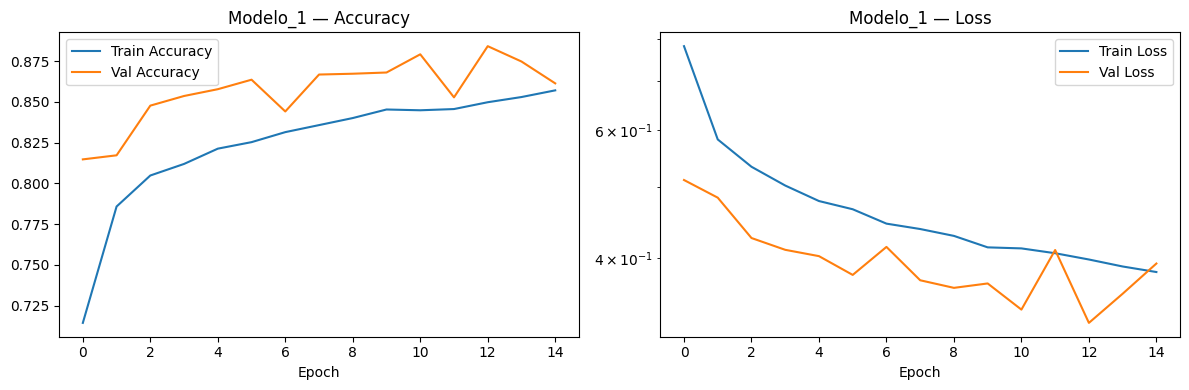

Modelo_1 — Test loss:    0.4090
Modelo_1 — Test accuracy: 0.8601

Modelo_1 — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.7419    0.8940    0.8109      1000
     Trouser     0.9809    0.9750    0.9779      1000
    Pullover     0.9249    0.6280    0.7481      1000
       Dress     0.9526    0.7630    0.8473      1000
        Coat     0.7504    0.8510    0.7976      1000
      Sandal     0.9471    0.9840    0.9652      1000
       Shirt     0.6037    0.6550    0.6283      1000
     Sneaker     0.9537    0.9070    0.9298      1000
         Bag     0.9045    0.9850    0.9430      1000
  Ankle boot     0.9374    0.9590    0.9481      1000

    accuracy                         0.8601     10000
   macro avg     0.8697    0.8601    0.8596     10000
weighted avg     0.8697    0.8601    0.8596     10000



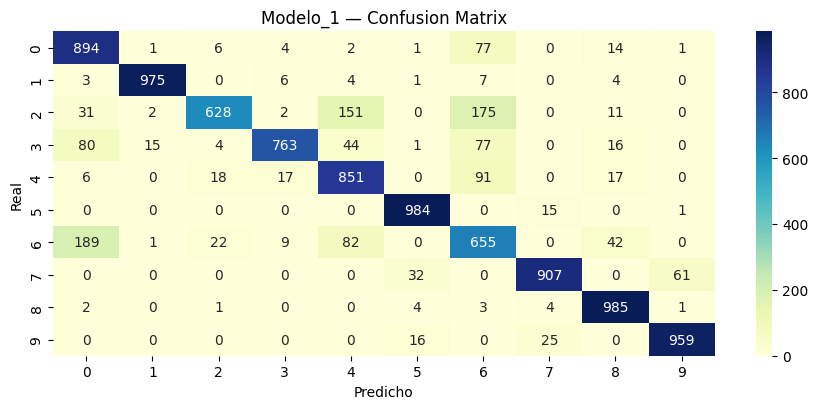

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_1.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.title(f'{model_1.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')

plt.tight_layout(); plt.show()

# Evaluación en test
score_1 = model_1.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_1.name} — Test loss:    {score_1[0]:.4f}')
print(f'{model_1.name} — Test accuracy: {score_1[1]:.4f}')

# Clasification report
y_pred_1 = model_1.predict(x_test_3ch, verbose=0)
Y_pred_1 = np.argmax(y_pred_1, axis=1)

print(f"\n{model_1.name} — Classification Report")
print(classification_report(Y_true, Y_pred_1, target_names=classnames, digits=4))

# Matriz de confusión
cm_1 = confusion_matrix(Y_true, Y_pred_1)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_1), annot=True, fmt='g', cmap='YlGnBu', ax=ax)
plt.title(f'{model_1.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_1.name, "test_acc": float(score_1[1])})

## **Evaluación del Modelo 2**

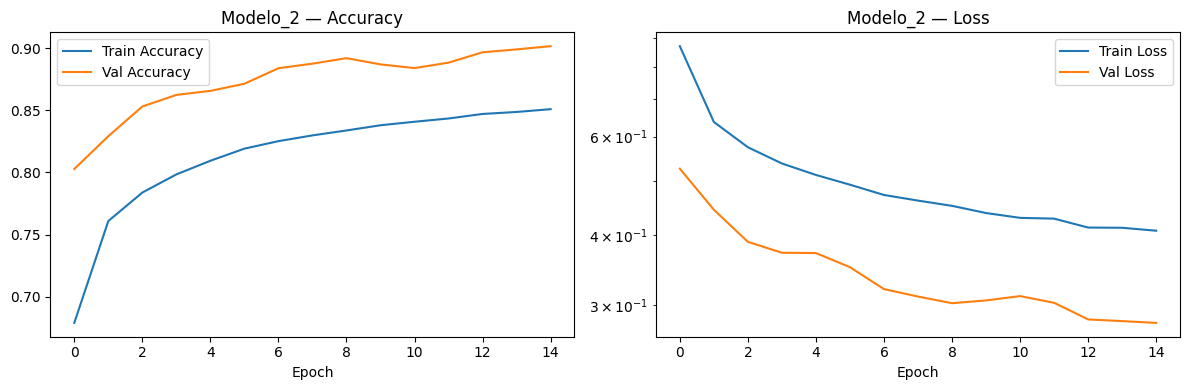

Modelo_2 — Test loss:    0.3005
Modelo_2 — Test accuracy: 0.8948

Modelo_2 — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8845    0.8040    0.8423      1000
     Trouser     0.9949    0.9690    0.9818      1000
    Pullover     0.8703    0.8320    0.8507      1000
       Dress     0.9033    0.8780    0.8905      1000
        Coat     0.8340    0.8490    0.8414      1000
      Sandal     0.9731    0.9770    0.9750      1000
       Shirt     0.6475    0.7550    0.6971      1000
     Sneaker     0.9434    0.9500    0.9467      1000
         Bag     0.9780    0.9800    0.9790      1000
  Ankle boot     0.9617    0.9540    0.9578      1000

    accuracy                         0.8948     10000
   macro avg     0.8991    0.8948    0.8962     10000
weighted avg     0.8991    0.8948    0.8962     10000



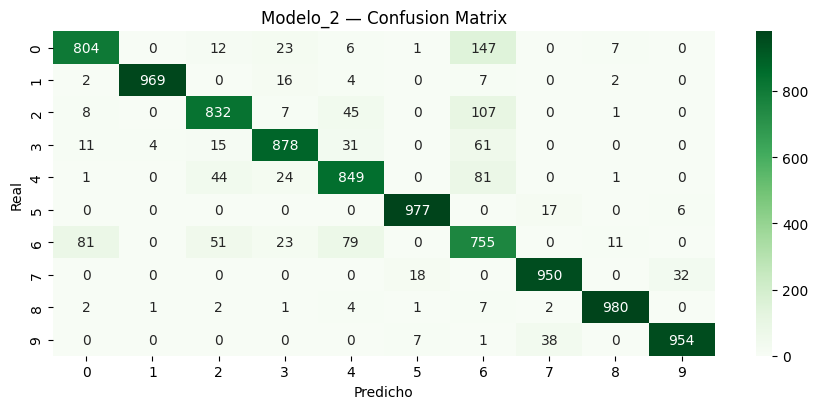

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_2.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.title(f'{model_2.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')

plt.tight_layout(); plt.show()

# Evaluación en test
score_2 = model_2.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_2.name} — Test loss:    {score_2[0]:.4f}')
print(f'{model_2.name} — Test accuracy: {score_2[1]:.4f}')

# Clasification report
y_pred_2 = model_2.predict(x_test_3ch, verbose=0)
Y_pred_2 = np.argmax(y_pred_2, axis=1)

print(f"\n{model_2.name} — Classification Report")
print(classification_report(Y_true, Y_pred_2, target_names=classnames, digits=4))

# Matriz de confusión
cm_2 = confusion_matrix(Y_true, Y_pred_2)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_2), annot=True, fmt='g', cmap='Greens', ax=ax)
plt.title(f'{model_2.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_2.name, "test_acc": float(score_2[1])})

## **Evaluación del Modelo 3**

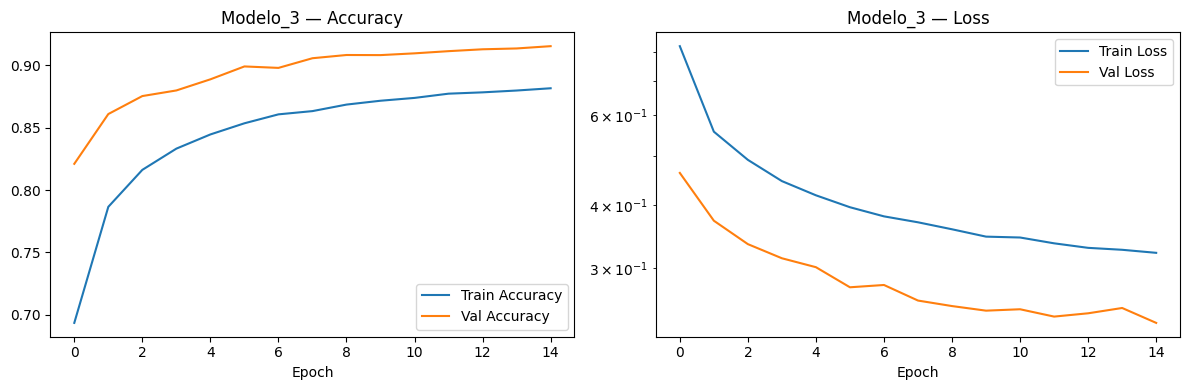

Modelo_3 — Test loss:    0.2440
Modelo_3 — Test accuracy: 0.9078

Modelo_3 — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8813    0.8240    0.8517      1000
     Trouser     0.9949    0.9830    0.9889      1000
    Pullover     0.8921    0.8760    0.8840      1000
       Dress     0.8920    0.9250    0.9082      1000
        Coat     0.8261    0.8600    0.8427      1000
      Sandal     0.9772    0.9860    0.9816      1000
       Shirt     0.7168    0.7190    0.7179      1000
     Sneaker     0.9626    0.9510    0.9567      1000
         Bag     0.9792    0.9880    0.9836      1000
  Ankle boot     0.9583    0.9660    0.9622      1000

    accuracy                         0.9078     10000
   macro avg     0.9081    0.9078    0.9077     10000
weighted avg     0.9081    0.9078    0.9077     10000



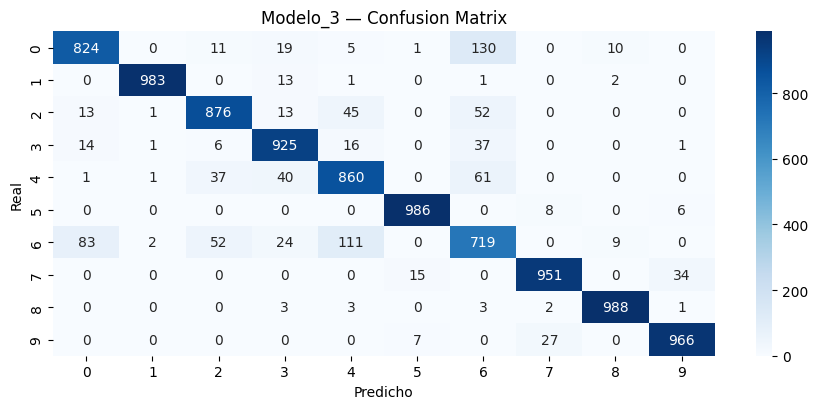

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_3.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Val Loss')
plt.title(f'{model_3.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')

plt.tight_layout(); plt.show()

# Evaluación en test
score_3 = model_3.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_3.name} — Test loss:    {score_3[0]:.4f}')
print(f'{model_3.name} — Test accuracy: {score_3[1]:.4f}')

# Clasification report
y_pred_3 = model_3.predict(x_test_3ch, verbose=0)
Y_pred_3 = np.argmax(y_pred_3, axis=1)

print(f"\n{model_3.name} — Classification Report")
print(classification_report(Y_true, Y_pred_3, target_names=classnames, digits=4))

# Matriz de confusión
cm_3 = confusion_matrix(Y_true, Y_pred_3)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_3), annot=True, fmt='g', cmap='Blues', ax=ax)
plt.title(f'{model_3.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_3.name, "test_acc": float(score_3[1])})

## **Evaluación del Modelo 4**

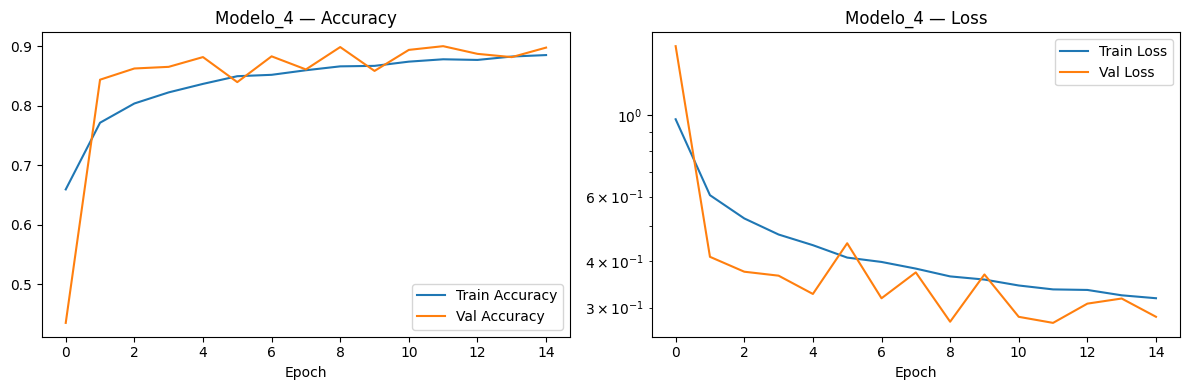

Modelo_4 — Test loss:    0.3066
Modelo_4 — Test accuracy: 0.8913

Modelo_4 — Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8450    0.8560    0.8505      1000
     Trouser     0.9688    0.9920    0.9802      1000
    Pullover     0.7273    0.9390    0.8197      1000
       Dress     0.9380    0.8780    0.9070      1000
        Coat     0.8314    0.7840    0.8070      1000
      Sandal     0.9722    0.9790    0.9756      1000
       Shirt     0.7891    0.6210    0.6950      1000
     Sneaker     0.9009    0.9730    0.9356      1000
         Bag     0.9791    0.9850    0.9821      1000
  Ankle boot     0.9923    0.9060    0.9472      1000

    accuracy                         0.8913     10000
   macro avg     0.8944    0.8913    0.8900     10000
weighted avg     0.8944    0.8913    0.8900     10000



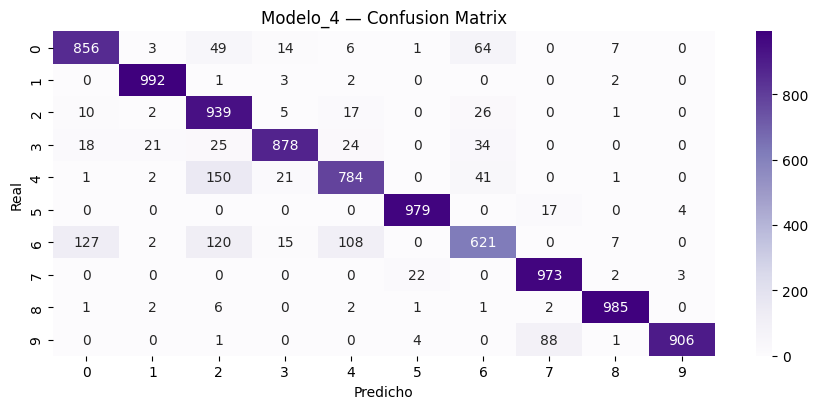

In [ ]:
# Curvas de entrenamiento
plt.figure(figsize=(12,4))

# Comparación del accuracy del train vs el val
plt.subplot(1,2,1)
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model_4.name} — Accuracy'); plt.xlabel('Epoch'); plt.legend()

# Comparación del loss del train vs el val
plt.subplot(1,2,2)
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Val Loss')
plt.title(f'{model_4.name} — Loss'); plt.xlabel('Epoch'); plt.legend(); plt.yscale('log')
plt.tight_layout(); plt.show()

# Evaluación en test
score_4 = model_4.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_4.name} — Test loss:    {score_4[0]:.4f}')
print(f'{model_4.name} — Test accuracy: {score_4[1]:.4f}')

# Clasification report
y_pred_4 = model_4.predict(x_test_3ch, verbose=0)
Y_pred_4 = np.argmax(y_pred_4, axis=1)

print(f"\n{model_4.name} — Classification Report")
print(classification_report(Y_true, Y_pred_4, target_names=classnames, digits=4))

# Matriz de confusión
cm_4 = confusion_matrix(Y_true, Y_pred_4)
fig, ax = plt.subplots(figsize=(9,4.2))
sn.heatmap(pd.DataFrame(cm_4), annot=True, fmt='g', cmap='Purples', ax=ax)
plt.title(f'{model_4.name} — Confusion Matrix'); plt.xlabel('Predicho'); plt.ylabel('Real')
plt.tight_layout(); plt.show()

# Guardar resultado de la métrica para comparación posterior
results.append({"modelo": model_4.name, "test_acc": float(score_4[1])})

# **Discusión de los resultados de los modelos**
Tras las fases entrenamiento y evaluacion de los 6 modelos se han obtenido los siguientes resultados de accuracy (métrica de rendimiento principal elegida para este caso). Los resultados están ordenados por rendimiento descendente.

In [ ]:
# Tabla final (conocidos + propios)
df_results = pd.DataFrame(results).sort_values("test_acc", ascending=False).reset_index(drop=True)
df_results

,modelo,test_acc
0,Modelo_3,0.9078
1,Modelo_2,0.8948
2,Modelo_4,0.8913
3,EfficientNetB0_Fashion,0.8820
4,Modelo_1,0.8601
5,MobileNetV2_Fashion,0.8448


El análisis de los resultados muestra que todas las arquitecturas propias obtuvieron un rendimiento superior al de los dos modelos de transfer learning. El mejor modelo fue el Modelo 3 con una accuracy del 90,87 %, seguido muy de cerca por los Modelos 4 y 2.

**Modelos propios**
*   Modelo 1: alcanzo un 87.6% de accuracy lo que significa que es una buena base y que una CNN sencilla puede competir con redes preentrenadas. Sirve para ver cuanto aportan otras tecnicas usadas en los siguientes modelos, como el dropout o el batch normalization.

*   Modelos 2 y 3: aumentando la profundidad y apilando más capas convolucionales, el rendimiento mejora. Esto demuestra que la arquitectura tipo VGG funciona muy bien en imágenes pequeñas. El modelo 3 es el que mejores resultados da (como veremos en el Ablation study por introducir el segundo bloque).

*   Modelo 4: aunque este modelo utilza técnicas como el Batch Normalization queda ligeramente por debajo del modelo 3. La explicación más razonable es que al ser un dataset sencillo, más capacidad no se traduce en más accuracy.


**Transffer learning**

Los modelos preentrenados fueron los que obtuvieron peores resultados dentro del conjunto de pruebas.
Esto se relaciona directamente con dos motivos:
*   Para poder ajustarse a los modelos se tiene que reescalar la imagen y esto degrada la señal.

*   Los pesos de ImageNet no se transfieren bien a imágenes en escala de grises. Además, la base de datos contiene imágenes de escenas y objetos del mundo real, en color y con fondos complejos, lo que supone un dominio significativamente distinto al de Fashion-MNIST, sin un fine-tuning más largo no compensa.

Aun así, el uso de EfficientNetB0 sobre otros modelos probados es una decisión acertada: es más ligera y permite trabajar con un escalado más razonable.

**Classification report y matriz de confusión**

Todas las redes clasifican bien las clases cuya silueta es muy distinta (pantalón, bolso, zapatilla) con F1 muy alto.

En cambio el grupo de prendas superiores *shirt*, *T-shirt/top*, *Pullover* y *Coat* tienen más errores. Son clases que comparten forma y al estar en escala de grises pierden más información de textura.Esta confusión es estructural, aparece en todos los modelos y explica porque superar el 90% no es facil.

En las matrices de confusión se observa que la mayoría de errores se concentran en el bloque de clases superiores, mientras que las clases de calzado y accesorios se reconocen casi perfectamente.

**Data augmentation**

El uso de "Data augmentation" ha sido imprescindible para que los modelos más profundos no sobreajustaran igual que el dropout. Sin estas técnicas los modelos densos hubieran memorizado el grupo de entrenamiento.

# **Conclusión**
En resumen y teniendo en cuenta todas las observaciones. para Fashion-MNIST es más efectivo diseñar una CNN especifica que aplicar transfer learning directamente.


# **Requisito extra 1: Ablation study Modelo 3**
Un ablation study es un proceso experimental sistemático. Este tipo de estudio consiste en modificar el modelo original eliminando o sustituyendo algunos de sus componentes para medir cuánto aporta cada uno de ellos al rendimiento final.

En este caso, se hacen 3 experimentos para validar las hipótesis sobre el modelo.

## **Experimento 1**



*   Metodología:
    * Replicar Modelo 3 sin las capas de Dropout
*   Justificación:
    * El dropout sirve para que la red no memorice todo el conjunto de entrenamiento cuando el modelo tiene mucha capacidad
*   Hipótesis:
    * Retirando el dropout el modelo debería ser mejor en train pero peor en val y test, es decir sobreajustar más. Si el test accuracy es muy inferior a 90% significa que el dropout es un componente necesario

In [ ]:
EPOCHS_ABLA = 15

# Crear el modelo
model_3_sin_Dropout = Sequential(name="Modelo_3_Ablation_Sin_Dropout")
model_3_sin_Dropout.add(Input(shape=input_shape))

# Bloque 1
model_3_sin_Dropout.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_sin_Dropout.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_sin_Dropout.add(MaxPooling2D(pool_size=(2, 2)))

# Bloque 2
model_3_sin_Dropout.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_sin_Dropout.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_sin_Dropout.add(MaxPooling2D(pool_size=(2, 2)))

# Clasificador
model_3_sin_Dropout.add(Flatten())
model_3_sin_Dropout.add(Dense(256, activation='relu'))
model_3_sin_Dropout.add(Dense(num_classes, activation='softmax'))

# Compilar modelo
model_3_sin_Dropout.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
model_3_sin_Dropout.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS_ABLA,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

# Evaluar modelo (test accuracy)
score_sin_Dropout = model_3_sin_Dropout.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_3_sin_Dropout.name} — Test accuracy: {score_sin_Dropout[1]:.4f}')

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.6553 - loss: 0.9310 - val_accuracy: 0.8344 - val_loss: 0.4462
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8119 - loss: 0.5021 - val_accuracy: 0.8633 - val_loss: 0.3631
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.8424 - loss: 0.4213 - val_accuracy: 0.8917 - val_loss: 0.2928
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.8649 - loss: 0.3626 - val_accuracy: 0.8932 - val_loss: 0.2960
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.8711 - loss: 0.3434 - val_accuracy: 0.9095 - val_loss: 0.2560
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.8822 - loss: 0.3179 - val_accuracy: 0.9094 - val_loss: 0.2504
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8859 - loss: 0.3055 - val_accuracy: 0.9098 - val_loss: 0.2502
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8921 - loss: 0.2850 - val_accurac

## **Experimento 2**
*   Metodología:
    * La parte convolucional del modelo no se altera pero en el clasificador se cambia Flatten() por GlobalAveragePooling2D()(GAP)

*   Justificación:
    * GAP es un método de reducción famoso porque reduce de forma drastica el número de párametros. Aun asi, puede eliminar información espacial fina

*   Hipótesis:
    * Las imágenes de Fashion-MNIST son pequeñas por lo que mantener la información espacial es importante. Se espera que esta versión obtenga un test accuracy menor

In [ ]:
# Crear el modelo
model_3_con_GAP = Sequential(name="Modelo_3_Ablation_con_GAP")
model_3_con_GAP.add(Input(shape=input_shape))

# Bloque 1
model_3_con_GAP.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_con_GAP.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_con_GAP.add(MaxPooling2D(pool_size=(2, 2)))
model_3_con_GAP.add(Dropout(0.2))

# Bloque 2
model_3_con_GAP.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_con_GAP.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_con_GAP.add(MaxPooling2D(pool_size=(2, 2)))
model_3_con_GAP.add(Dropout(0.3))

# Clasificador (CON GAP)
model_3_con_GAP.add(GlobalAveragePooling2D())
model_3_con_GAP.add(Dense(256, activation='relu'))
model_3_con_GAP.add(Dropout(0.5))
model_3_con_GAP.add(Dense(num_classes, activation='softmax'))

# Compilar  modelo
model_3_con_GAP.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar  modelo
model_3_con_GAP.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS_ABLA,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

# Evaluar modelo
score_con_GAP = model_3_con_GAP.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_3_con_GAP.name} — Test accuracy: {score_con_GAP[1]:.4f}')

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.3657 - loss: 1.6206 - val_accuracy: 0.7128 - val_loss: 0.7796
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6917 - loss: 0.8462 - val_accuracy: 0.7760 - val_loss: 0.6122
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7381 - loss: 0.7147 - val_accuracy: 0.7802 - val_loss: 0.5568
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7582 - loss: 0.6536 - val_accuracy: 0.8168 - val_loss: 0.4988
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7742 - loss: 0.6080 - val_accuracy: 0.8145 - val_loss: 0.4874
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7898 - loss: 0.5686 - val_accuracy: 0.8341 - val_loss: 0.4620
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.7998 - loss: 0.5399 - val_accuracy: 0.8489 - val_loss: 0.4239
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8099 - loss: 0.5200 - 

## **Experimento 3**
*   Metodología:
    * Eliminar segundo bloque CONV (64 filtros)
*   Justificación:
    * Este experimento nos muestra el valor de la profundidad. Si al quitar el segundo bloque el rendimiento baja podemos concluir que incluir un segundo bloque es muy significativo
*   Hipótesis:
    * El test accuracy bajara, mostrando que el modelo sin el bloque 2 esta limitado y que aumentar la profundidad es efectivo

In [ ]:
# Crear el modelo
model_3_un_Bloque = Sequential(name="Modelo_3_Ablation_un_Bloque")
model_3_un_Bloque.add(Input(shape=input_shape))

# Bloque 1
model_3_un_Bloque.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_un_Bloque.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_un_Bloque.add(MaxPooling2D(pool_size=(2, 2)))
model_3_un_Bloque.add(Dropout(0.2))

# Bloque 2 (ELIMINADO)

# Clasificador
model_3_un_Bloque.add(Flatten())
model_3_un_Bloque.add(Dense(256, activation='relu'))
model_3_un_Bloque.add(Dropout(0.5))
model_3_un_Bloque.add(Dense(num_classes, activation='softmax'))

# Compilar modelo
model_3_un_Bloque.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
model_3_un_Bloque.fit(
    datagen.flow(x_train_3ch, y_train_cat, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_3ch) // BATCH_SIZE,
    epochs=EPOCHS_ABLA,
    validation_data=(x_val_3ch, y_val_cat),
    verbose=1
)

# Evaluar modelo
score_un_Bloque = model_3_un_Bloque.evaluate(x_test_3ch, y_test_cat, verbose=0)
print(f'{model_3_un_Bloque.name} — Test accuracy: {score_un_Bloque[1]:.4f}')

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.6175 - loss: 1.0226 - val_accuracy: 0.8238 - val_loss: 0.4790
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.7763 - loss: 0.5999 - val_accuracy: 0.8325 - val_loss: 0.4403
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.7979 - loss: 0.5403 - val_accuracy: 0.8547 - val_loss: 0.3976
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.8094 - loss: 0.5094 - val_accuracy: 0.8656 - val_loss: 0.3632
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.8198 - loss: 0.4725 - val_accuracy: 0.8755 - val_loss: 0.3440
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.8284 - loss: 0.4582 - val_accuracy: 0.8854 - val_loss: 0.3162
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8365 - loss: 0.4339 - val_accuracy: 0.8893 - val_loss: 0.3084
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.8428 - loss: 0.4223 - 

## **Resultados**
Los resultados del estudio confirman que el diseño original del modelo 3 es el más adecuado.
Al quitar el dropout el rendimiento apenas baja, aunque con más epochs quitar el dropout tendría un mayor sobreajuste.
En cambio, si se quita el segundo bloque el accuracy cae aproximadamente 2 puntos lo que demuestra que la profundidad extra claramante aporta al rendimiento.
La peor variante es la que sustituye Flatten por GAP (casi 6 puntos) lo que indica que en imágenes pequeñas es más importante conservar la información espacial que reducir los parámetros.

En la siguiente tabla se pueden comparar los resultados.

In [ ]:
ablation_results = [
    {"modelo": "Modelo_3 Base", "test_acc": score_3[1]},
    {"modelo": "Modelo_3 sin Dropout", "test_acc": score_sin_Dropout[1]},
    {"modelo": "Modelo_3 con GAP", "test_acc": score_con_GAP[1]},
    {"modelo": "Modelo_3 un Bloque", "test_acc": score_un_Bloque[1]}
]
df_ablation = pd.DataFrame(ablation_results).sort_values("test_acc", ascending=False)
print("\nTabla de Ablation Study (Modelo 3)")
print(df_ablation.to_markdown(index=False))


Tabla de Ablation Study (Modelo 3)
| modelo               |   test_acc |
|:---------------------|-----------:|
| Modelo_3 sin Dropout |     0.9187 |
| Modelo_3 Base        |     0.9078 |
| Modelo_3 un Bloque   |     0.8963 |
| Modelo_3 con GAP     |     0.8608 |


# **Requisito extra 2: Visualización de Activaciones Convolucionales**

Esta sección analiza la información que captura el Modelo 3 en cada una de sus capas. El objetivo es comprobar si la red esta aprendiendo de manera jerárquica: desde patrones muy sencillos hasta representaciones más complejas. Si esto se cumple, se demostraría que el modelo no se limita a memorizar ejemplos.

Con el objetivo de acortar el resultado he decidido no mostrar todas las capas:
*   Capa superficial para detectar bordes y cambios de intensidad.
*   Capa intermedia para que componga patrones.
*   Capa profunda para que vea la forma general de la prenda.

**Metodología:**

Se construye un modelo intermedio, que reutiliza la entrada del Modelo 3 pero en vez de devolver la predicción final, devuelve las salidas de cada capa convolucional. Sobre una imagen de prueba, se ejecuta el modelo y se obtienen los mapas de activación para cada capa, sirven para ver que zonas de la imagen han sido las más relevantes para cada filtro.

**Interpretación:**

*   Primeras capas: rasgos de bajo nivel
    * Bordes
    * Cambios de intensidad
    * Texturas locales
*   Capas más profundas: estructuras más amplias
    * Silueta
    * Contorno
    * Forma

Si las activaciones aparecen bien definidas significa que el modelo esta aprendiendo y que el rendimiento esta justificado.

# Seleccionar imagen
Usamos un indice fijo para que siempre obtengamos la misma imagen.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Imagen de prueba seleccionada (Índice: 30)
Etiqueta real: Bag
Etiqueta predicha por Modelo_3: Bag


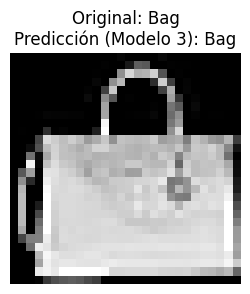

In [ ]:
img_idx = 30
sample_image = x_test_3ch[img_idx]
true_label = Y_true[img_idx]

# Añadir dimensión de batch
sample_image_batch = np.expand_dims(sample_image, axis=0)

# Predecir la imagen con el modelo 3
predicted_prob = model_3.predict(sample_image_batch)
predicted_label = np.argmax(predicted_prob)

# Mostrar la imagen seleccionada junto con la etiqueta real y la predicción
print(f"Imagen de prueba seleccionada (Índice: {img_idx})")
print(f"Etiqueta real: {classnames[true_label]}")
print(f"Etiqueta predicha por Modelo_3: {classnames[predicted_label]}")

plt.figure(figsize=(3,3))
plt.imshow(sample_image)
plt.title(f"Original: {classnames[true_label]}\nPredicción (Modelo 3): {classnames[predicted_label]}")
plt.axis('off')
plt.show()

# Crear modelo de activación
El modelo debe tener la misma entrada que el Modelo 3 original pero la salida tienen que ser todas las capas convolucionales internas. Para esto busco todas las capas cuyo nombre contenga "conv2d".

In [ ]:
# Capas convolucionales del modelo
conv_layer_names = [
    layer.name for layer in model_3.layers
    if 'conv2d' in layer.name
]
print("Capas convolucionales detectadas en el modelo 3:")
print(conv_layer_names)

# Elegir cuales visualizar
first_layer_name  = conv_layer_names[0]
middle_layer_name = conv_layer_names[len(conv_layer_names)//2]
last_layer_name   = conv_layer_names[-1]

layers_to_show = [first_layer_name, middle_layer_name, last_layer_name]
print("\nCapas que se visualizaran :")
print(layers_to_show)

selected_layer_outputs = [
    model_3.get_layer(name).output for name in layers_to_show
]
# Crear nuevo modelo
activation_model = Model(
    inputs=model_3.inputs,
    outputs=selected_layer_outputs,
    name="modelo_visualizacion_activaciones"
)

Capas convolucionales detectadas en el modelo 3:
['conv2d_3', 'conv2d_4', 'conv2d_5', 'conv2d_6']

Capas que se visualizaran :
['conv2d_3', 'conv2d_5', 'conv2d_6']


# Obtener activaciones
El objetivo es conseguir una lista con las activaciones, para ello predecimos una sola vez.

In [ ]:
activations = activation_model.predict(sample_image_batch)

print(f"Activaciones obtenidas. Total de capas: {len(activations)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Activaciones obtenidas. Total de capas: 3


# Visualizar las activaciones
Mostramos los mapas de activación para cada capa.


Visualizando activaciones para la capa: conv2d_3 (tiene 32 filtros, se muestran como máximo 16)


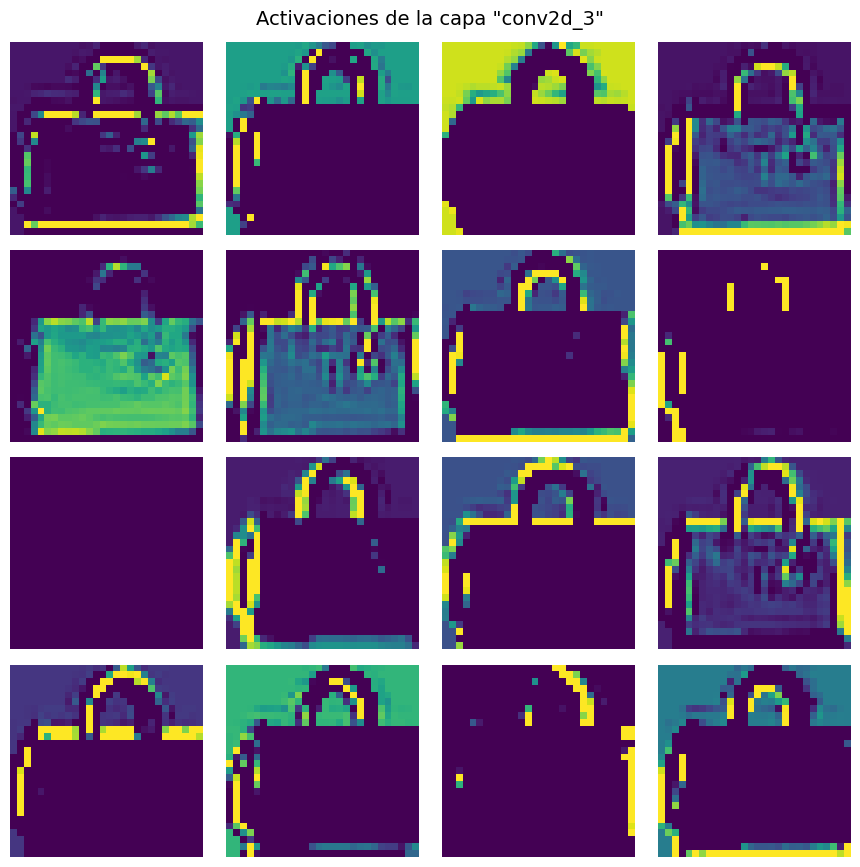


Visualizando activaciones para la capa: conv2d_5 (tiene 64 filtros, se muestran como máximo 16)


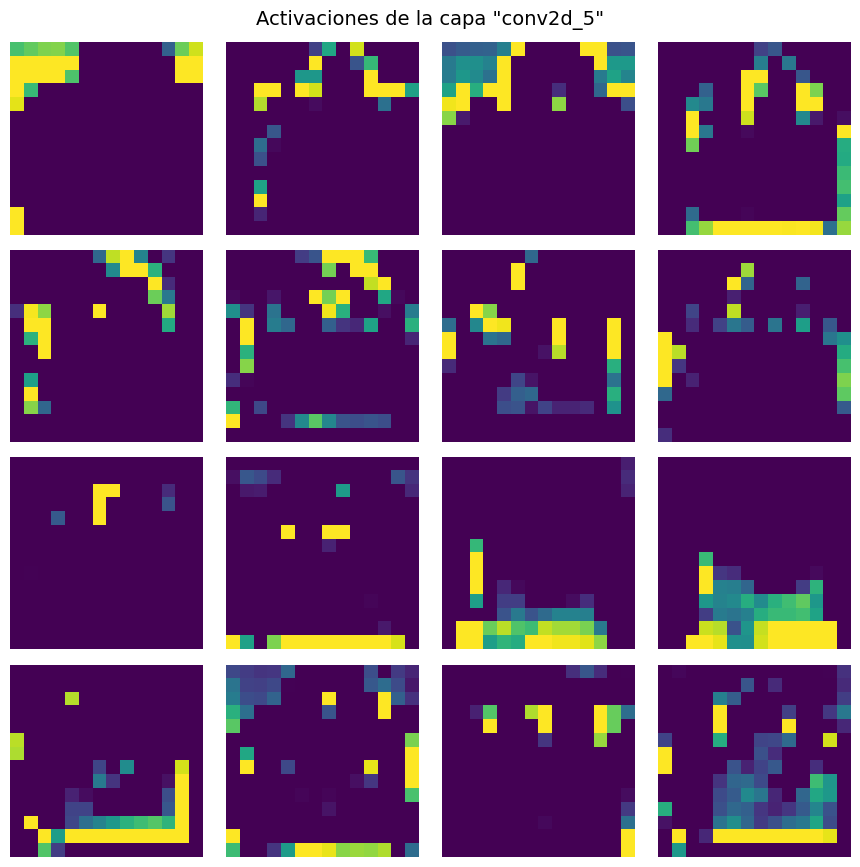


Visualizando activaciones para la capa: conv2d_6 (tiene 64 filtros, se muestran como máximo 16)


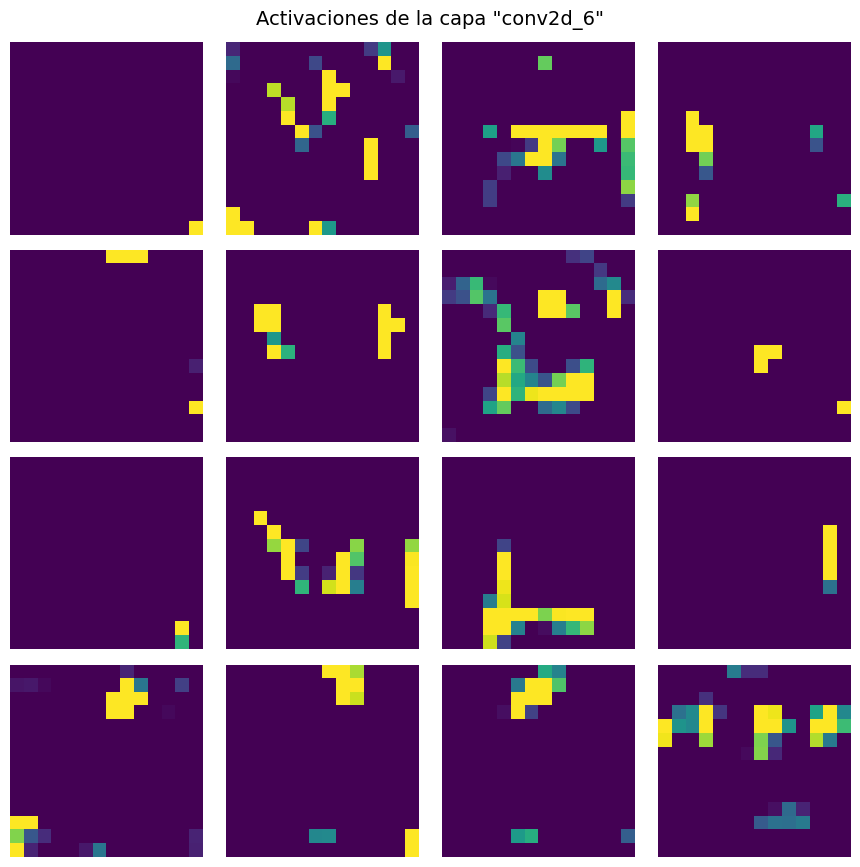

In [ ]:
# Cuanto filtros se muestran por capa
max_filters_to_show = 16
cols = 4

for layer_name, layer_activation in zip(layers_to_show, activations):
   # Cada layer_activation por defecto tiene esta forma ((1, alto, ancho, num_filtros)) lo convertimos en (alto, ancho, num_filtros)    activations_map = layer_activation[0]
    activations_map = layer_activation[0]
    num_filters = activations_map.shape[-1]

    print(f"\nVisualizando activaciones para la capa: {layer_name} "
          f"(tiene {num_filters} filtros, se muestran como máximo {max_filters_to_show})")

    # Crear cuadrícula para los filtros
    filters_to_plot = min(num_filters, max_filters_to_show)
    rows = (filters_to_plot + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2.2, rows*2.2))
    fig.suptitle(f'Activaciones de la capa "{layer_name}"', fontsize=14)

    # Obtener una lista plana de axes
    axes = axes.flatten() if rows > 1 else [axes]

    # Bucle para dibujar el mapa de activacion de los filtros de la capa
    for i in range(filters_to_plot):
        ax = axes[i]

        # Extraer el mapa de activación para el filtro
        channel_image = activations_map[:, :, i]

        # Normalizar para que se vea mejor
        channel_image -= channel_image.mean()
        channel_image /= (channel_image.std() + 1e-5)
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        # Dibujar el mapa
        ax.imshow(channel_image, cmap='viridis')
        ax.axis('off')

    # ocultar subplots sobrantes
    for j in range(filters_to_plot, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()